In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import string



In [2]:
#reading the dataset
df = pd.read_csv("IMDB Dataset.csv")

#displaying dataset
df.head(10)


,Data,Type
0,Pretty good movie. I was not sure about watchi...,positive
1,It was very good. I really liked this movie an...,positive
2,We enjoyed it. It was good and decent.,positive
3,"I like it. Overall, it is not bad and I enjoy...",positive
4,Decent movie. I like it.,positive
5,One of the other reviewers has mentioned that ...,positive
6,A wonderful little production. <br /><br />The...,positive
7,I thought this was a wonderful way to spend ti...,positive
8,Basically there's a family where a little boy ...,negative
9,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
#cleaning the dataset

df.Data=df.Data.str.lower() #converting to lowercase

df.Data = df.Data.str.replace(r'<[^<>]*>', '', regex = True) #removing html tags

df.Data = df.Data.str.replace(r'https ? ://\s+|www\.\s+', '', regex = True) #removing urls

df.Data = df.Data.str.replace('[{}]'.format(string.punctuation), '', regex = True) #removing punctuations


#displaying dataset after cleaning
df.head(10)


,Data,Type
0,pretty good movie i was not sure about watchin...,positive
1,it was very good i really liked this movie and...,positive
2,we enjoyed it it was good and decent,positive
3,i like it overall it is not bad and i enjoyed it,positive
4,decent movie i like it,positive
5,one of the other reviewers has mentioned that ...,positive
6,a wonderful little production the filming tech...,positive
7,i thought this was a wonderful way to spend ti...,positive
8,basically theres a family where a little boy j...,negative
9,petter matteis love in the time of money is a ...,positive


In [4]:

#splitting the dataset into train and test

train_df, test_df = train_test_split(df,train_size=0.6,random_state=1088)

In [5]:
#Splitting dataset to column

X_train, y_train = train_df['Data'], train_df['Type']
X_test, y_test = test_df['Data'], test_df['Type']

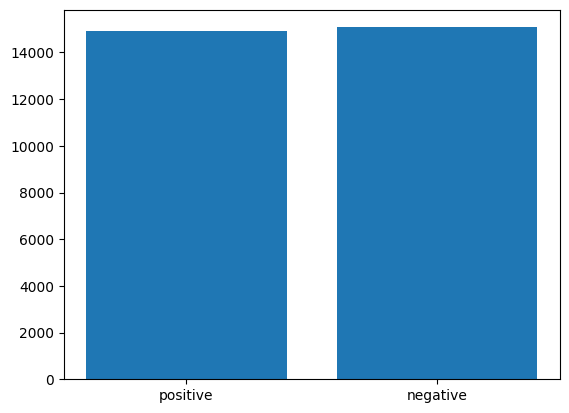

In [6]:

# Count the number of positive and negative labels
pos_count = sum(y == 'positive' for y in y_train)
neg_count = sum(y == 'negative' for y in y_train)

# Plot the counts
plt.bar(['positive', 'negative'], [pos_count, neg_count])
plt.show()


In [7]:
#Using TfidfVectorizer to convert text to vectors and using stop words to remove any common words like "and" , "the" , etc.
#Using Logistic Regression to train the model

pipe = make_pipeline(TfidfVectorizer(stop_words='english'), LogisticRegression(max_iter=500))
pipe.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [8]:
#finding coefficients and magnitude of the features
pipe.named_steps['logisticregression'].coef_

#extracting coefficients and converting to list
coefficients = pipe.named_steps["logisticregression"].coef_.flatten().tolist()

#Extracting features
text_columns = pipe.named_steps["tfidfvectorizer"].get_feature_names_out()

#dataframe of coefficients and magnitude
coefs = {
    "coefficient": coefficients,
    "magnitude": np.absolute(coefficients),
 }

#sorting in ascending order
coef_df = pd.DataFrame(coefs, index=text_columns).sort_values("magnitude", ascending=False)

#displaying top 10 features
coef_df.head(n=10)

,coefficient,magnitude
worst,-10.255677,10.255677
great,8.508452,8.508452
bad,-8.482919,8.482919
waste,-7.717388,7.717388
awful,-7.397534,7.397534
excellent,7.162749,7.162749
best,6.243784,6.243784
boring,-6.143382,6.143382
terrible,-6.020880,6.020880
poor,-5.829782,5.829782


In [9]:

#Creating Confusion Matrix
y_pred = pipe.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[8637 1285]
 [ 990 9090]]


In [10]:

# Convert labels to binary values
y_test_binary = [1 if label == 'positive' else 0 for label in y_test]
y_pred_binary = [1 if label == 'positive' else 0 for label in y_pred]

# Accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test_binary, y_pred_binary)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test_binary, y_pred_binary)
print(f"Recall: {recall:.2f}")

# F1 score
f1 = f1_score(y_test_binary, y_pred_binary)
print(f"F1 score: {f1:.2f}")




Accuracy: 0.89
Precision: 0.88
Recall: 0.90
F1 score: 0.89
